# Assignment 5
## Machine Learning - ITE-5310
### Humber College - October 2022
#### Name: Nguyen Anh Tuan Le
#### Student ID: N014141295

# Importing the Abalone Dataset

In [120]:
import pandas as pd
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)

In [121]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [122]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [123]:
abalone = abalone.drop("Sex", axis=1)

# Descriptive Statistics From the Abalone Dataset

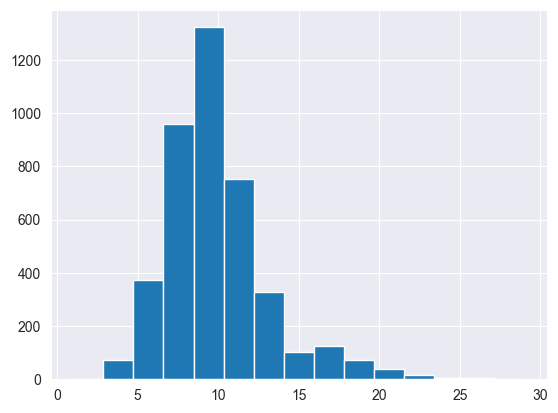

In [124]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [125]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

# Define “Nearest” Using a Mathematical Definition of Distance

In [126]:
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

# Find the k Nearest Neighbors

In [127]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [128]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

In [129]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [130]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644])

# Voting or Averaging of Multiple Neighbors

In [131]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10])

# Average for Regression

In [132]:
prediction = nearest_neighbor_rings.mean()

# Mode for Classification

In [133]:
import scipy.stats
class_neighbors = np.array(["A", "B", "B", "C"])
scipy.stats.mode(class_neighbors)

/var/folders/yn/_50lh29d3b30g7y82_6f3ysh0000gn/T/ipykernel_4430/2310526112.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(class_neighbors)
/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/var/folders/yn/_50lh29d3b30g7y82_6f3ysh0000gn/T/ipykernel_4430/2310526112.py:3: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be use

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

# Splitting Data Into Training and Test Sets for Model Evaluation

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

# Fitting a kNN Regression in scikit-learn to the Abalone Dataset

In [135]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [136]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# Using scikit-learn to Inspect Model Fit

In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [138]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

## RMSE of training data is different from RMSE of test data => overfitting

# Plotting the Fit of Your Model

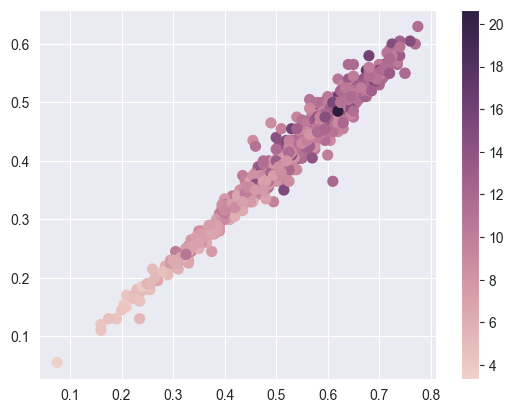

In [139]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

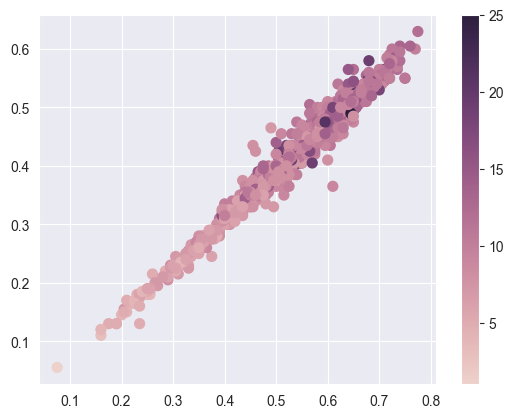

In [140]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

# Improving kNN Performances in scikit-learn Using GridSearchCV

In [141]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [142]:
gridsearch.best_params_

{'n_neighbors': 25}

In [143]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

2.0731180327543384

In [144]:
test_rmse

2.1700197339962175

## RMSE of training data is worse than the previous model but the RMSE of test data is better than the previous model and the two RMSEs are closer together => less overfitting

# Adding Weighted Average of Neighbors Based on Distance

In [145]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [146]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1634265584947485

## adding weighted average of neighbors based on distance yields even better results

# Further Improving on kNN in scikit-learn With Bagging

In [147]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k, weights=best_weights
)

In [148]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [149]:
bagging_model.fit(X_train, y_train)
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1658709852470217

# bagged kNN changes RMSE marginally => not very necessary in this case

1. random k                     =>  RMSE = 2.37
2. best k (GridSearchCV)        =>  RMSE = 2.17
3. best k + added weights       =>  RMSE = 2.16
4. best k + weights + bagged    =>  RMSE = 2.16

Conclusion: kNN's performance can be improved by finding the best k, adding weights, and bagging but the most significance one is finding the best k.